In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import cv2 as cv

In [23]:
def remap(img,x,y):
    """ a wrapper of opencv remap, adopted from 
    img:NxHxW, x:NxHxW ,y:NxHxW
    out:NxHxW
    Implement Scaling and Squaring
    https://github.com/yongleex/DiffeomorphicPIV/blob/main/deformpiv.py#L180
    """
    
    # convert x,y to grid:NxHxWx2
    grid = torch.stack((x, y), dim=-1)
    
    # normalize grid to (-1,1) for grid_sample
    # under pixel coordination system, x->W, y->H
    grid_shape = grid.shape[1:3]
    grid[:,:,:,0] = (grid[:,:,:,0] / (grid_shape[1] - 1) - 0.5)*2
    grid[:,:,:,1] = (grid[:,:,:,1] / (grid_shape[0] - 1) - 0.5)*2

    # shape img to NxCxHxW for grid_sample
    img = torch.unsqueeze(img, dim=1)
    out = F.grid_sample(img, grid, mode='bicubic', align_corners=True)
    
    return torch.squeeze(out, dim=1)

(4, 440, 1024)


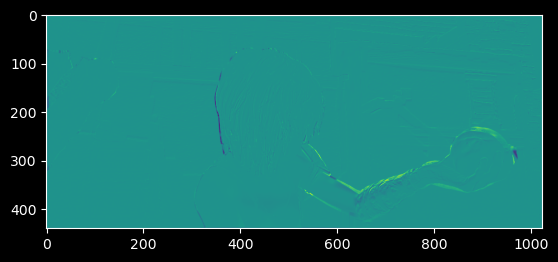

In [24]:
path = 'data/0016.npy'

data = np.load(path)
print(data.shape)
data_tensor = torch.tensor(data)
image1 = data[0]
image2 = data[1]
u = data[2]
v = data[3]

# 使用Lee的方法
# image1_tensor, image2_tensor, u_tensor, v_tensor = data_tensor.split(1, 0)
# re = remap(image1_tensor, u_tensor, v_tensor)
# re = (re + image1_tensor)[0].numpy()
# # re_image = re.astype('uint8')

# # print(re_image.shape)
# # plt.imsave('111.png', re_image)
# print(re.shape)
# plt.imsave('111.png', re)

# 使用opencv的方法
x, y = np.meshgrid(np.arange(u.shape[1]), np.arange(u.shape[0]))
x = np.float32(x)
y = np.float32(y)
re = cv.remap(image1, x+u, y+v, interpolation = 4)
plt.figure()
plt.imshow(re-image2)
plt.show()